In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns

In [2]:
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)

In [9]:
pe = positional_encoding(30,30)

<AxesSubplot:>

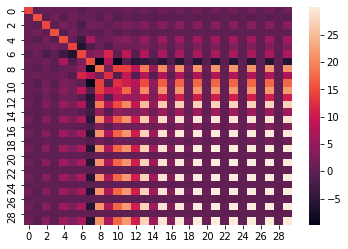

In [10]:
sns.heatmap(tf.matmul(pe,pe,transpose_a = True)[0])

<AxesSubplot:>

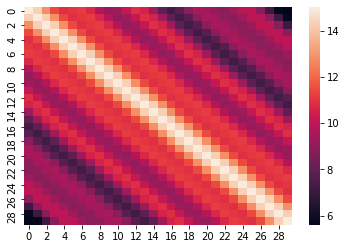

In [11]:
sns.heatmap(tf.matmul(pe,pe,transpose_b = True)[0])

In [3]:
n, d = 30,30
pos_encoding = positional_encoding(n, d)
pos_encoding = pos_encoding[0]
pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

<AxesSubplot:>

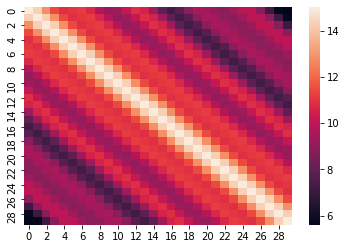

In [6]:
sns.heatmap(tf.matmul(pos_encoding,pos_encoding,transpose_a = True))

<AxesSubplot:>

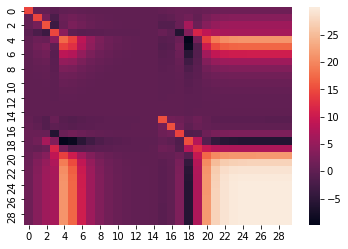

In [7]:
sns.heatmap(tf.matmul(pos_encoding,pos_encoding,transpose_b = True))

In [16]:
tf.signal.fft(tf.eye(4,dtype=tf.complex64))

<tf.Tensor: shape=(4, 4), dtype=complex64, numpy=
array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j,  0.-1.j]], dtype=complex64)>

In [19]:
tf.signal.rfft(tf.eye(10,dtype=float))

<tf.Tensor: shape=(10, 6), dtype=complex64, numpy=
array([[ 1.        +0.0000000e+00j,  1.        +0.0000000e+00j,
         1.        +0.0000000e+00j,  1.        -0.0000000e+00j,
         1.        -0.0000000e+00j,  1.        +0.0000000e+00j],
       [ 1.        +0.0000000e+00j,  0.809017  -5.8778524e-01j,
         0.30901697-9.5105654e-01j, -0.30901697-9.5105654e-01j,
        -0.809017  -5.8778524e-01j, -1.        +0.0000000e+00j],
       [ 1.        +0.0000000e+00j,  0.309017  -9.5105654e-01j,
        -0.809017  -5.8778524e-01j, -0.809017  +5.8778524e-01j,
         0.309017  +9.5105654e-01j,  1.        +0.0000000e+00j],
       [ 1.        +0.0000000e+00j, -0.309017  -9.5105654e-01j,
        -0.809017  +5.8778530e-01j,  0.809017  +5.8778530e-01j,
         0.309017  -9.5105654e-01j, -1.        +0.0000000e+00j],
       [ 1.        +0.0000000e+00j, -0.809017  -5.8778524e-01j,
         0.309017  +9.5105654e-01j,  0.309017  -9.5105654e-01j,
        -0.809017  +5.8778524e-01j,  1.        +0

In [44]:
d_model = 100
seq_len = 100

base = (np.pi * np.linspace(-1,1,seq_len)[:,None]) * (np.arange(d_model)//2)
sin_base = np.sin(base)
cos_base = np.cos(base)

fourier_base = np.zeros((seq_len,d_model))
fourier_base[0::2] = cos_base[0::2]
fourier_base[1::2] = sin_base[1::2]

<AxesSubplot:>

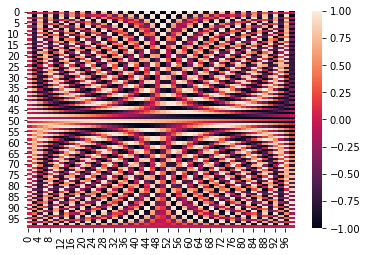

In [48]:
sns.heatmap(fourier_base)

<AxesSubplot:>

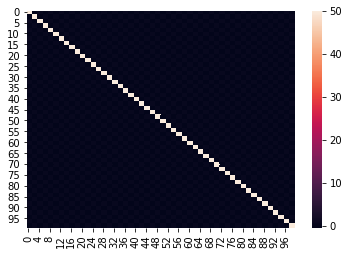

In [46]:
sns.heatmap(tf.matmul(fourier_base,fourier_base,transpose_a = True))

<AxesSubplot:>

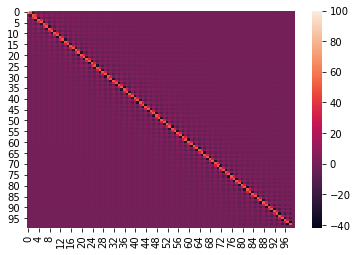

In [47]:
sns.heatmap(tf.matmul(fourier_base,fourier_base,transpose_b = True))